**This lab will be done in Python. For the lab to be complete, all questions must be answered.
We will be using the county_level_election.csv dataset, which contains 2016 election data. We are going
to measure ‘votergap’ as the outcome. This is defined as votergap = % Trump votes - % Clinton votes.
The data are one row per unique county. Within the U.S., it is possible to have counties with the same
name in different states.**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Section 1. Exploratory Data Analysis

**1. What is the average votergap, assuming all counties are weighted equally?**

In [4]:
df = pd.read_csv('county_level_election.csv')

print(df.head())

      state  fipscode             county  population  hispanic  minority  \
0  Colorado      8117      Summit County       27239    15.173     4.918   
1  Colorado      8037       Eagle County       53653    30.040     5.169   
2     Idaho     16067    Minidoka County       19226    34.070     5.611   
3  Colorado      8113  San Miguel County        7558    10.154     4.747   
4      Utah     49051     Wasatch County       21600    13.244     4.125   

   female  unemployed  income  nodegree  bachelor  inactivity  obesity  \
0  45.996         2.5   68352       5.4      48.1         8.1     13.1   
1  47.231         3.1   76661      10.1      47.3         9.4     11.8   
2  49.318         3.7   46332      24.1      11.8        18.3     34.2   
3  46.808         3.7   59603       4.7      54.4        12.4     16.7   
4  48.812         3.4   65207       9.5      34.4        13.9     23.0   

   density  cancer  votergap   trump  clinton  
0     46.0    46.2   -27.632  31.530   59.162  
1 

In [5]:
avg_counties = df['votergap'].mean()

print(f"The average voter gap, assuming all counties weighted equally, is: {avg_counties}")

The average voter gap, assuming all counties weighted equally, is: 31.723198303979103


**2. What is the average votergap, assuming all states are weighted equally?**

In [7]:
votergap_state = df.groupby('state')['votergap'].mean()

print(votergap_state)

state
Alabama                 30.624328
Arizona                 10.878600
Arkansas                34.423400
California              -6.351860
Colorado                19.812361
Connecticut             -6.493500
Delaware                -0.899000
District of Columbia   -88.725000
Florida                 26.953537
Georgia                 30.287145
Hawaii                 -35.023000
Idaho                   45.912690
Illinois                32.012833
Indiana                 39.984130
Iowa                    27.844232
Kansas                  53.285067
Kentucky                49.859725
Louisiana               29.518875
Maine                    3.865750
Maryland                 6.594125
Massachusetts          -29.453214
Michigan                22.677976
Minnesota               24.104839
Mississippi             14.013829
Missouri                50.575513
Montana                 42.996863
Nebraska                58.672263
Nevada                  41.088706
New Hampshire           -0.277000
New Jers

In [10]:
avg_states = votergap_state.mean()

print(f"The average voter gap, assuming all states weighted equally, is: {avg_states}")

The average voter gap, assuming all states weighted equally, is: 20.815670013022892


**3. Estimate the national overall votergap, assuming the entire population voted? Hint: To get the votergap overall, you will need to take the population average. Assuming everyone voted, the # of Clinton voters in a county = % Clinton votes x population.**

In [12]:
avg_population = (df['votergap'] * df['population']).sum() / df['population'].sum()

print(f"The estimated national overall voter gap, assuming the entire population voted, is: {avg_population}")

The estimated national overall voter gap, assuming the entire population voted, is: -2.7885068043713805


**4. What explains the difference between these quantities?**

The ways we try to weight the votes. We may get different results if we treat states with unequal populations differently.

# Section 2. Decision Trees

Now, we will explore the factors that predicted votergap. The predictive model will be built using a decision tree regressor. Create an 80/20 split for training the model and testing it. We will tune the depth hyperparameter using 10 folds cross validation. For this, fit decision trees having depths between 1 and 20 nodes. For accuracy, use the .score method. Information about how to fit this type of model can be found in the sklearn documentation.

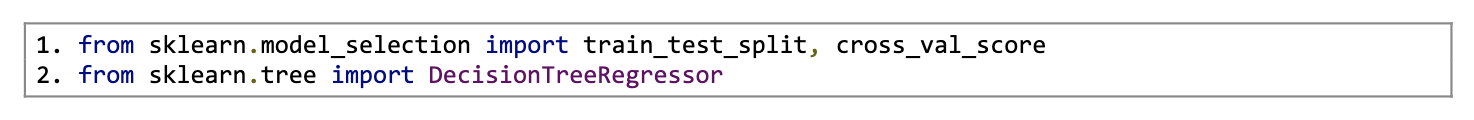

**1. Plot the number of nodes (max depth) on the X axis against the accuracy on the y axis, with separate lines for the training data and the mean cross validation. The following link provides information about how to plot learning curves using cross validation.**

*Hint: Make sure you use the correct model.*

In [16]:
X = df[['population', 'hispanic', 'minority', 'female', 'unemployed', 'income', 'nodegree', 'bachelor', 'inactivity', 'obesity', 'density', 'cancer']]
y = df[['votergap']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

train_scores = []
cv_means = []
cv_stds = []

max_depths = range(1, 21)

In [18]:
for depth in max_depths:
    tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    tree.fit(X_train, y_train)
    
    train_scores.append(tree.score(X_train, y_train))
    cv_scores = cross_val_score(tree, X_train, y_train, cv = 10)
    cv_means.append(np.mean(cv_scores))
    cv_stds.append(np.std(cv_scores))

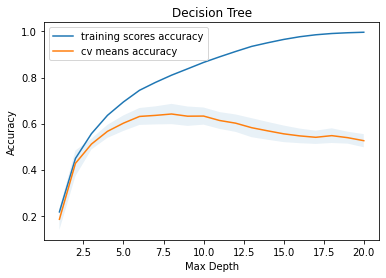

In [24]:
plt.figure()
plt.plot(max_depths, train_scores, label = 'training scores accuracy')
plt.plot(max_depths, cv_means, label = 'cv means accuracy')

plt.fill_between(max_depths, np.array(cv_means) - np.array(cv_stds), np.array(cv_means) + np.array(cv_stds), alpha = 0.1)

plt.title('Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**2. Based on the plot, how many nodes would you recommend as the max depth?**

I would recommend to choose 6 nodes as the max depth, as the cross validation value reaches maximum at the depth of 6, which means we may get the best result at this point.

**3. The mean accuracy from cross validation starts to fall off at a certain point, why?**

Because after this point, the model begins to suffer from overfitting.